# **UW-Madison GI Tract Image Segmentation**

Track healthy organs in medical scans to improve cancer treatment

**Progetto Big Data**

Giorgio Tocco

Vincenzo Messina

In [3]:
!python --version

Python 3.7.12


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
import sys
from PIL import Image

# **Funzioni per codifica/decodifica RLE**

*https://www.kaggle.com/code/paulorzp/run-length-encode-and-decode/script*

In [3]:
import numpy as np

# Run-length encoding
def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    
    return ' '.join(str(x) for x in runs)

def rle_decode(mask_rle, shape, color=1):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros((shape[0] * shape[1], shape[2]), dtype=np.float32)
    for lo, hi in zip(starts, ends):
        img[lo : hi] = color
    return img.reshape(shape)

# **Creazione immagini png delle maschere**

In [ ]:
from PIL import Image, ImageOps
from matplotlib import pyplot as plt

f = open("/kaggle/input/uw-madison-gi-tract-image-segmentation/train.csv", "r")
large_bowel_RLEs = []
small_bowel_RLEs = []
stomach_RLEs = []

large_bowel_paths = []
small_bowel_paths = []
stomach_paths = []

i = -1
for line in f:
    i += 1
    if i == 0:
        continue
    cols = line.split(",")
    id_split = cols[0].split("_")
    path = id_split[0] + "/" + id_split[0] + "_" + id_split[1] + "/" + id_split[2] + id_split[3] + "_" + cols[1]
    # large bowel
    if i % 3 == 1:
        if not os.path.exists("/kaggle/working/uw-madison-gi-tract-image-segmentation/large_bowel_masks/" + id_split[0] + "/" + id_split[0] + "_" + id_split[1]):
            os.makedirs("/kaggle/working/uw-madison-gi-tract-image-segmentation/large_bowel_masks/" + id_split[0] + "/" + id_split[0] + "_" + id_split[1])
        large_bowel_paths.append(path)
        RLE = cols[2].strip()
        large_bowel_RLEs.append(RLE)
    # small bowel
    if i % 3 == 2:
        if not os.path.exists("/kaggle/working/uw-madison-gi-tract-image-segmentation/small_bowel_masks/" + id_split[0] + "/" + id_split[0] + "_" + id_split[1]):
            os.makedirs("/kaggle/working/uw-madison-gi-tract-image-segmentation/small_bowel_masks/" + id_split[0] + "/" + id_split[0] + "_" + id_split[1])
        small_bowel_paths.append(path)
        RLE = cols[2].strip()
        small_bowel_RLEs.append(RLE)
    # stomach
    if i % 3 == 0:
        if not os.path.exists("/kaggle/working/uw-madison-gi-tract-image-segmentation/stomach_masks/" + id_split[0] + "/" + id_split[0] + "_" + id_split[1]):
            os.makedirs("/kaggle/working/uw-madison-gi-tract-image-segmentation/stomach_masks/" + id_split[0] + "/" + id_split[0] + "_" + id_split[1])
        stomach_paths.append(path)
        RLE = cols[2].strip()
        stomach_RLEs.append(RLE)

#print(stomach_RLEs)
#print(stomach_paths)

large_bowel_masks = []
small_bowel_masks = []
stomach_masks = []

target_organ = "stomach"

if target_organ == "large_bowel":
    for (path, RLE) in zip(large_bowel_paths, large_bowel_RLEs):
        path_split = path.split("/")
        filename = os.listdir("/kaggle/input/uw-madison-gi-tract-image-segmentation/train/" + path_split[0] + "/" + path_split[1] + "/scans")[0]
        filename = filename.split(".")[0]
        filename = filename.split("_")
        width = int(filename[3])
        length = int(filename[2])
        # print("w: " + str(width) + ", l: " + str(length))
        large_bowel_masks.append(rle_decode(RLE, shape=(width, length, 1), color=1).reshape(width, length))
    
    for (path, mask) in zip(large_bowel_paths, large_bowel_masks):
        # im = ImageOps.invert(Image.fromarray(np.uint8(m*1), mode="L"))
        im = Image.fromarray(np.uint8(mask*255), mode="L")
        # im = im.crop((0, 0, 256, 256))
        im.save("/kaggle/working/uw-madison-gi-tract-image-segmentation/large_bowel_masks/" + path + ".png")
elif target_organ == "small_bowel":
    for (path, RLE) in zip(small_bowel_paths, small_bowel_RLEs):
        path_split = path.split("/")
        filename = os.listdir("/kaggle/input/uw-madison-gi-tract-image-segmentation/train/" + path_split[0] + "/" + path_split[1] + "/scans")[0]
        filename = filename.split(".")[0]
        filename = filename.split("_")
        width = int(filename[3])
        length = int(filename[2])
        # print("w: " + str(width) + ", l: " + str(length))
        small_bowel_masks.append(rle_decode(RLE, shape=(width, length, 1), color=1).reshape(width, length))
        
    for (path, mask) in zip(small_bowel_paths, small_bowel_masks):
        # im = ImageOps.invert(Image.fromarray(np.uint8(m*1), mode="L"))
        im = Image.fromarray(np.uint8(mask*255), mode="L")
        # im = im.crop((0, 0, 256, 256))
        im.save("/kaggle/working/uw-madison-gi-tract-image-segmentation/small_bowel_masks/" + path + ".png")
elif target_organ == "stomach":
    for (path, RLE) in zip(stomach_paths, stomach_RLEs):
        path_split = path.split("/")
        filename = os.listdir("/kaggle/input/uw-madison-gi-tract-image-segmentation/train/" + path_split[0] + "/" + path_split[1] + "/scans")[0]
        filename = filename.split(".")[0]
        filename = filename.split("_")
        width = int(filename[3])
        length = int(filename[2])
        # print("w: " + str(width) + ", l: " + str(length))
        stomach_masks.append(rle_decode(RLE, shape=(width, length, 1), color=1).reshape(width, length))
    
    for (path, mask) in zip(stomach_paths, stomach_masks):
        # im = ImageOps.invert(Image.fromarray(np.uint8(m*1), mode="L"))
        im = Image.fromarray(np.uint8(mask*255), mode="L")
        # im = im.crop((0, 0, 256, 256))
        im.save("/kaggle/working/uw-madison-gi-tract-image-segmentation/stomach_masks/" + path + ".png")


# **Installazione implementazione keras di modelli U-Net**

*https://github.com/karolzak/keras-unet*

In [4]:
!pip install keras_unet

# **Caricamento delle immagini in memoria**

In [5]:
masks = []
orgs = []

cases = ["case" + str(i) for i in range(1, 157, 1)]
days = ["day" + str(i) for i in range(0, 40)]

target_organ = "stomach"

for case in cases:
    for day in days:
        folder = case + "/" + case + "_" + day + "/"
        #masks += glob.glob("/kaggle/working/uw-madison-gi-tract-image-segmentation/masks/" + folder + "*.png")
        orgs += glob.glob("/kaggle/input/uw-madison-gi-tract-image-segmentation/train/" + folder + "scans/" + "*.png")

for org in orgs:
    splitted = org.split("/scans/")
    first_part = splitted[0].replace("input", "working").replace("train", target_organ + "_masks")
    slice_num = splitted[1].split("_")
    second_part = "slice" + slice_num[1] + "_" + target_organ + ".png"
    total = first_part + "/" + second_part
    masks.append(total)
        
print(len(masks))
print(masks[50:60])
print(len(orgs))
print(orgs[50:60])

38496
['/kaggle/working/uw-madison-gi-tract-image-segmentation/stomach_masks/case2/case2_day1/slice0079_stomach.png', '/kaggle/working/uw-madison-gi-tract-image-segmentation/stomach_masks/case2/case2_day1/slice0136_stomach.png', '/kaggle/working/uw-madison-gi-tract-image-segmentation/stomach_masks/case2/case2_day1/slice0010_stomach.png', '/kaggle/working/uw-madison-gi-tract-image-segmentation/stomach_masks/case2/case2_day1/slice0119_stomach.png', '/kaggle/working/uw-madison-gi-tract-image-segmentation/stomach_masks/case2/case2_day1/slice0022_stomach.png', '/kaggle/working/uw-madison-gi-tract-image-segmentation/stomach_masks/case2/case2_day1/slice0048_stomach.png', '/kaggle/working/uw-madison-gi-tract-image-segmentation/stomach_masks/case2/case2_day1/slice0071_stomach.png', '/kaggle/working/uw-madison-gi-tract-image-segmentation/stomach_masks/case2/case2_day1/slice0102_stomach.png', '/kaggle/working/uw-madison-gi-tract-image-segmentation/stomach_masks/case2/case2_day1/slice0044_stomach.

In [6]:
imgs_list = []
masks_list = []

empty_mask_counter = 0
images_counter = 0

for image, mask in zip(orgs, masks):
    images_counter += 1
    if images_counter % 13 != 3:
        continue
    mask_array = np.array(Image.open(mask).resize((256,256)))
    if mask_array.any():
        imgs_list.append(np.array(Image.open(image).resize((256,256))))
        masks_list.append(mask_array)
    else:
        empty_mask_counter += 1
        if empty_mask_counter % 4 == 0:
            imgs_list.append(np.array(Image.open(image).resize((256,256))))
            masks_list.append(mask_array)

imgs_np = np.asarray(imgs_list)
masks_np = np.asarray(masks_list)

print(imgs_np.shape, masks_np.shape)

(1233, 256, 256) (1233, 256, 256)


-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


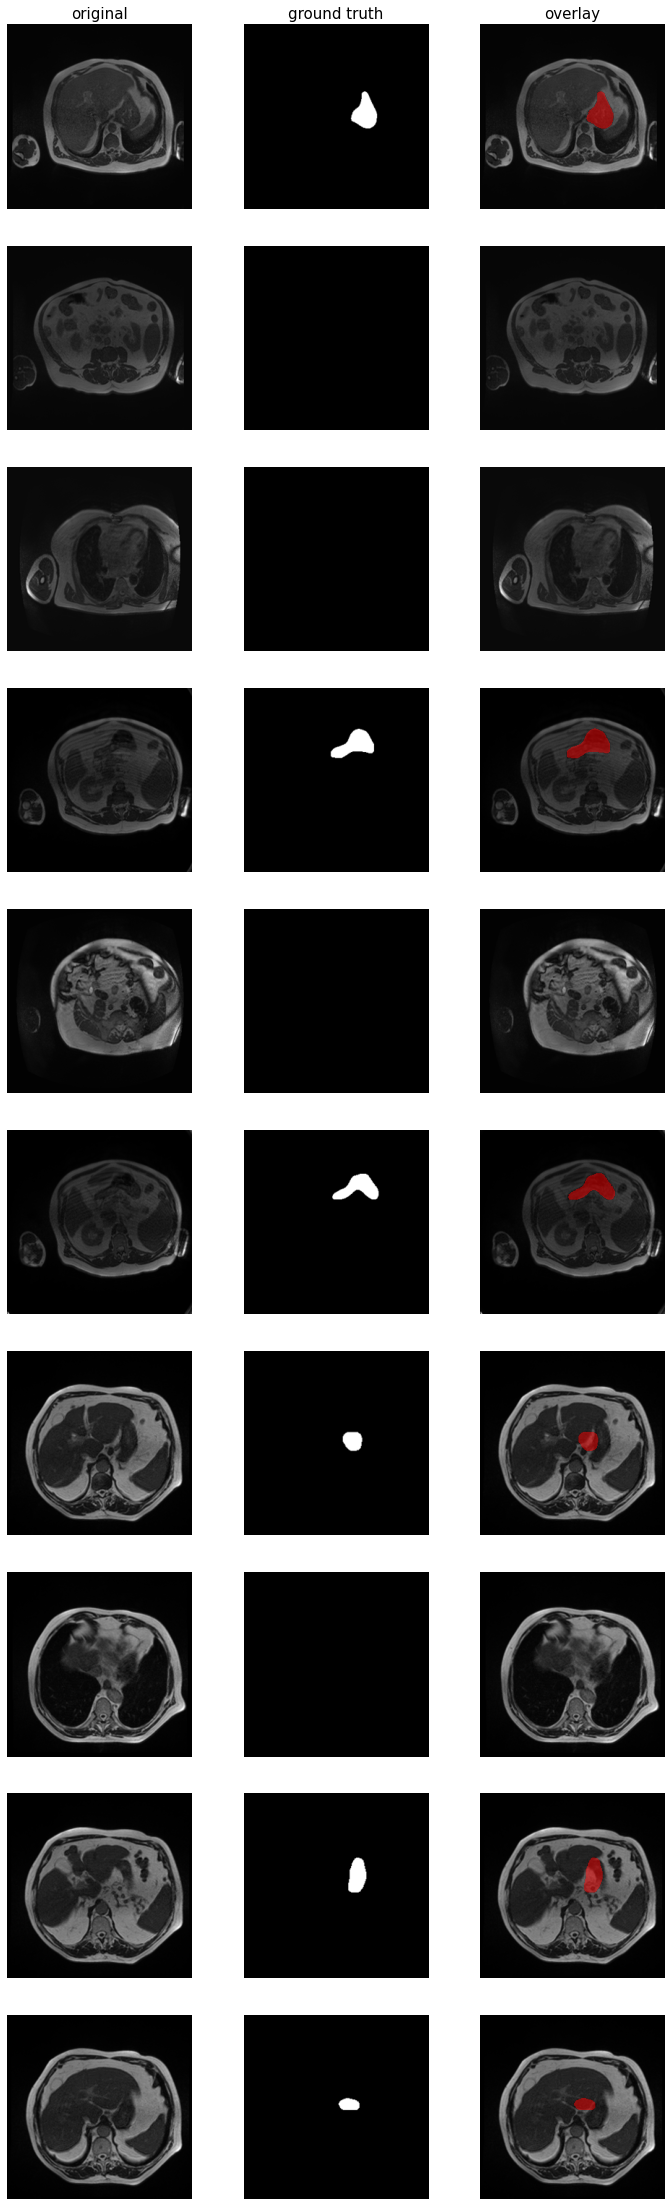

In [7]:
from keras_unet.utils import plot_imgs

slide = 4

plot_imgs(org_imgs=imgs_np[(slide-1)*10:(slide)*10], mask_imgs=masks_np[(slide-1)*10:(slide)*10], nm_img_to_plot=10, figsize=4)

# **Normalizzazione delle immagini**

In [8]:
print(imgs_np.max(), masks_np.max())
x = np.asarray(imgs_np, dtype=np.float32)/16177
y = np.asarray(masks_np, dtype=np.float32)/255
print(x.max(), y.max())
print(x.shape, y.shape)
y = y.reshape(y.shape[0], y.shape[1], y.shape[2], 1)
x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)
print(x.shape, y.shape)

15838 255
0.9790443 1.0
(1233, 256, 256) (1233, 256, 256)
(1233, 256, 256, 1) (1233, 256, 256, 1)


# **Split del dataset in training e validation set**

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.9, random_state=0)

print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (123, 256, 256, 1)
y_train:  (123, 256, 256, 1)
x_val:  (1110, 256, 256, 1)
y_val:  (1110, 256, 256, 1)


# **Data augmentation**

In [10]:
from keras_unet.utils import get_augmented

train_gen = get_augmented(
    x_train, y_train, batch_size=2,
    data_gen_args = dict(
        rotation_range=5.,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=40,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=False,
        fill_mode='constant'
    ))

(2, 256, 256, 1) (2, 256, 256, 1)


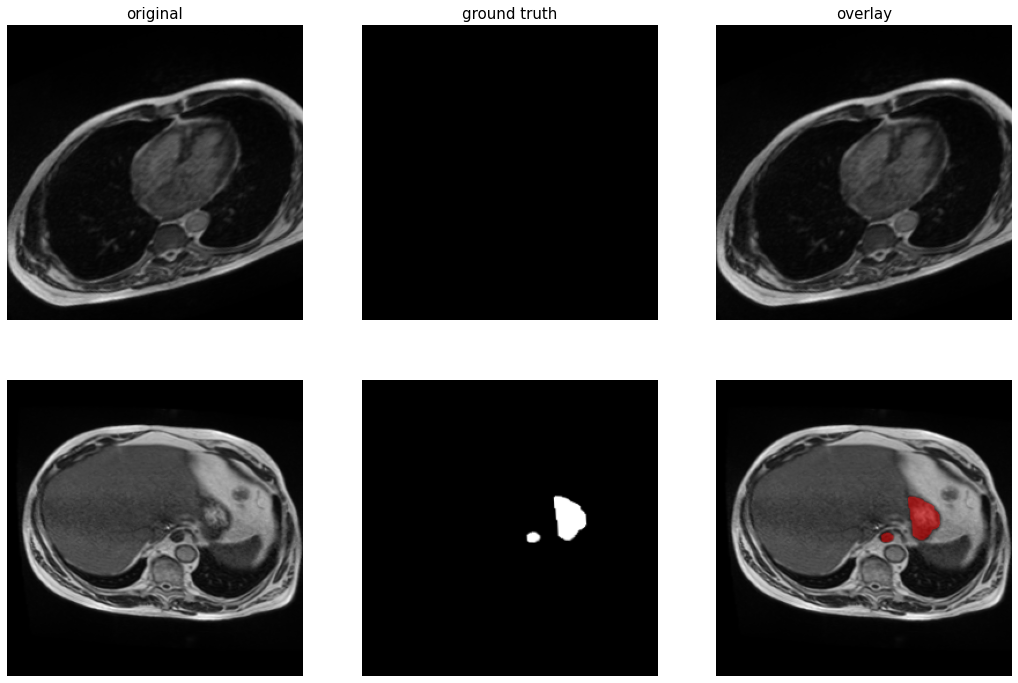

In [11]:
sample_batch = next(train_gen)
xx, yy = sample_batch
print(xx.shape, yy.shape)
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=xx, mask_imgs=yy, nm_img_to_plot=2, figsize=6)

# **Definizione del modello U-Net**

In [12]:
from keras_unet.models import custom_unet
from keras_unet.models import vanilla_unet

input_shape = x_train[0].shape
#input_shape = (256, 256, 1)

model = custom_unet(
    input_shape,
    filters=32,
    use_batch_norm=True,
    dropout=0.3,
    dropout_change_per_layer=0.0,
    num_layers=4
)

2023-02-02 08:48:43.542846: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-02 08:48:43.636097: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-02 08:48:43.636890: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-02 08:48:43.638040: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 288         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
spatial_dropout2d (SpatialDropo (None, 256, 256, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

# **Compilazione del modello**

In [14]:
from keras.callbacks import ModelCheckpoint

model_filename = "/kaggle/working/1238_64_200_20_kaggle_" + target_organ + ".h5"
#model.load_weights(model_filename)
print(model_filename)
callback_checkpoint = ModelCheckpoint(
    model_filename, 
    verbose=0, 
    monitor='val_loss', 
    save_best_only=True,
)

/kaggle/working/1238_64_200_20_kaggle_stomach.h5


In [15]:
from tensorflow.keras.optimizers import Adam, SGD
from keras_unet.metrics import iou, iou_thresholded, dice_coef
from keras_unet.losses import jaccard_distance

model.compile(
    optimizer=Adam(), 
    #optimizer=SGD(lr=0.01, momentum=0.99),
    loss='binary_crossentropy',
    #loss=jaccard_distance,
    metrics=[iou, iou_thresholded]
)

# **Addestramento del modello**

In [ ]:
history = model.fit(
    train_gen,
    batch_size=64,
    steps_per_epoch=800,
    epochs=80,

    validation_data=(x_val, y_val),
    callbacks=[callback_checkpoint]
)

# **Visualizzazione dei risultati del modello**

In [ ]:
from keras_unet.utils import plot_segm_history

plot_segm_history(history)

In [16]:
model.load_weights(model_filename)
y_pred = model.predict(x_val)

2023-02-02 08:49:26.749122: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-02-02 08:49:27.891252: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


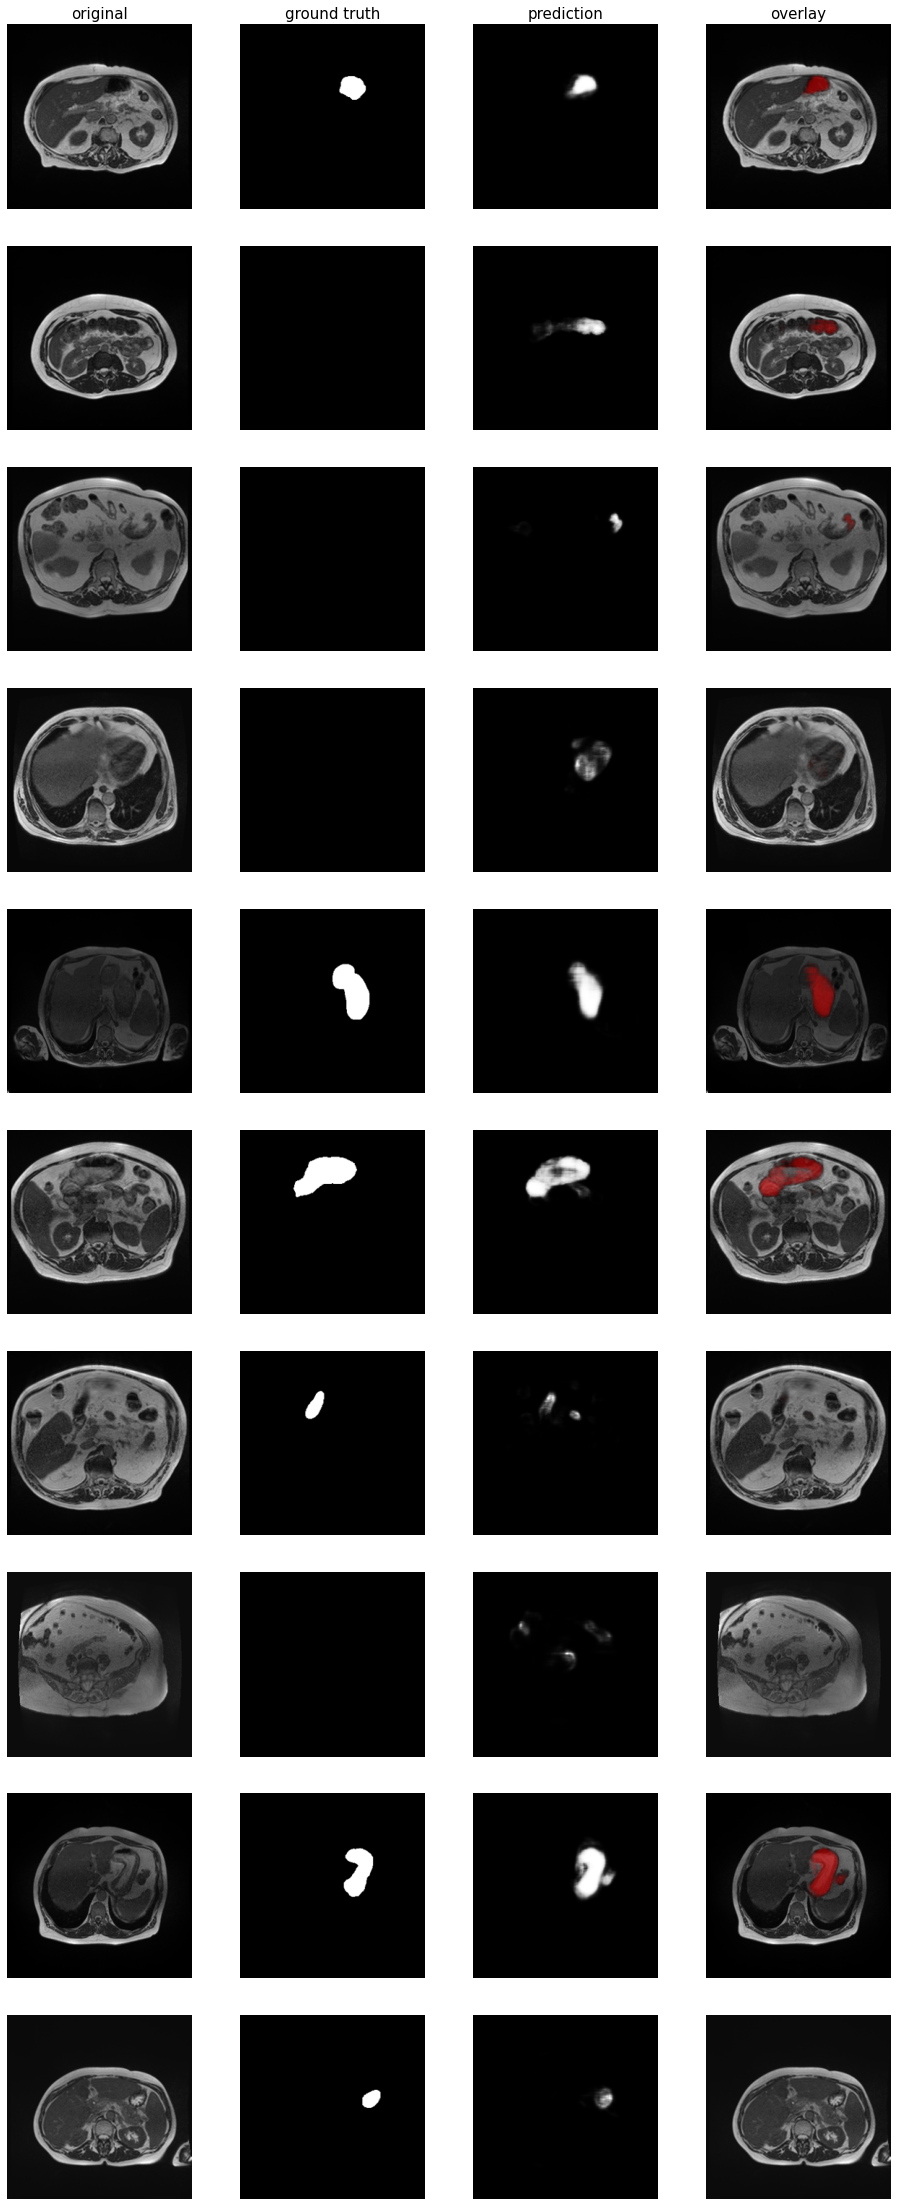

In [17]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=x_val, mask_imgs=y_val, pred_imgs=y_pred, nm_img_to_plot=10)

# **Prediction delle maschere**

In [ ]:
import math
from keras_unet.utils import plot_imgs

ids = []
test_images = []
for path in orgs[0:math.floor(len(orgs)/8)]:
    splitted = path.split("/scans/")
    case_and_day = splitted[0].split("/")[-1]
    splitted = splitted[1].split("_")
    slice_number = "slice_" + splitted[1]
    id = case_and_day + "_" + slice_number
    ids.append(id)
    img = np.array(Image.open(path).resize((256,256)))
    test_images.append(img)

test_images = np.asarray(test_images, dtype=np.float32)/16177
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)
predictions = model.predict(test_images)

plot_imgs(org_imgs=test_images, mask_imgs=predictions, pred_imgs=predictions, nm_img_to_plot=10)

In [ ]:
thresholded_predictions = []
rle_predictions = []

i = 0
for pred in predictions:
    reshaped = pred.reshape(256, 256)
    max = reshaped.max()
    reshaped = (reshaped > (max * 0.8)) * 1
    encoded = rle_encode(reshaped)
    rle_predictions.append(encoded)
    decoded = rle_decode(encoded, shape=(256, 256, 1), color=1).reshape(256, 256)
    im = Image.fromarray(np.uint8(decoded*255), mode="L")
    thresholded_predictions.append(decoded)
    if i == 8:
        im.save("/kaggle/working/test.png")
    i += 1

thresholded_predictions = np.asarray(thresholded_predictions)
plot_imgs(org_imgs=test_images, mask_imgs=thresholded_predictions, pred_imgs=thresholded_predictions, nm_img_to_plot=10)

# **Creazione di *submission.csv***

In [ ]:
import csv

# open the file in the write mode
f = open('/kaggle/working/submission.csv', 'a')

# create the csv writer
writer = csv.writer(f)

# header = ["id", "class", "prediction"]
# writer.writerow(header)

# write a row to the csv file
for (id, rle) in zip(ids, rle_predictions):
    row = [id, target_organ, rle]
    writer.writerow(row)

# close the file
f.close()